# Exploratory data analysis 

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('data.csv', quotechar='"', delimiter=',', on_bad_lines='skip', encoding='utf-8', doublequote=True)

In [76]:
df = df.dropna()

In [77]:
df.count()

label    455785
model    455785
text     455785
dtype: int64

In [39]:
df['label'].dtype

dtype('O')

In [78]:
df.head()

,label,model,text
0,1,llama3-8b,Hitler's plans for the succession and power st...
1,0,human,Really really the best pedi ever! Pho was so a...
2,1,gpt-35,Offshore tax shelters are financial arrangemen...
3,1,GLM130B,It seems that I have a problem. I wish that I ...
4,1,text-davinci-003,"When I was growing up, I always looked forward..."


In [79]:
df = df[(df['label'] == '1') | (df['label'] == '0')]

In [80]:
df['label'].value_counts()

label
1    292512
0    163059
Name: count, dtype: int64

C:\Users\artur\AppData\Local\Temp\ipykernel_51596\1729689859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['label'], palette='RdYlGn', edgecolor='black')


Text(0, 0.5, 'Label')

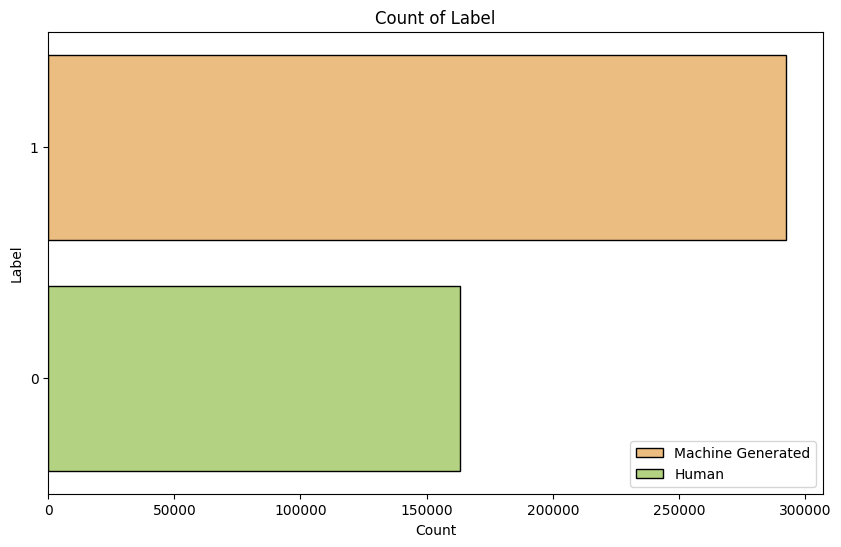

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(df['label'], palette='RdYlGn', edgecolor='black')
plt.title('Count of Label')
plt.legend(['Machine Generated', 'Human'])
plt.xlabel('Count')
plt.ylabel('Label')

In [82]:
df['model'].value_counts()

model
human               163059
gpt-3.5-turbo        31791
bloomz               18665
cohere               17290
davinci              17100
gpt-35               15109
text-davinci-003     14220
mixtral-8x7b         12232
text-davinci-002     12015
llama3-70b            9366
llama3-8b             9321
gemma-7b-it           8797
gpt4o                 6971
dolly                 6764
gpt4                  6697
flan_t5_small         6152
gemma2-9b-it          6148
flan_t5_base          6082
t0_3b                 6052
flan_t5_xxl           6018
flan_t5_large         6005
flan_t5_xl            5880
t0_11b                5776
opt_iml_max_1.3b      4316
opt_iml_30b           4132
opt_30b               3693
opt_13b               3660
30B                   3614
65B                   3576
gpt_neox              3494
opt_6.7b              3387
opt_2.7b              3332
13B                   3281
opt_350m              3241
bloom_7b              3141
opt_125m              3141
opt_1.3b              

In [83]:
df_grouped = df.groupby(['label', 'model']).size().reset_index(name='count')
df_sorted = df_grouped.sort_values(by='count', ascending=False)
df_sorted

,label,model,count
0,0,human,163059
19,1,gpt-3.5-turbo,31791
7,1,bloomz,18665
8,1,cohere,17290
9,1,davinci,17100
20,1,gpt-35,15109
40,1,text-davinci-003,14220
27,1,mixtral-8x7b,12232
39,1,text-davinci-002,12015
25,1,llama3-70b,9366


Text(0.5, 1.0, 'Number of samples per model')

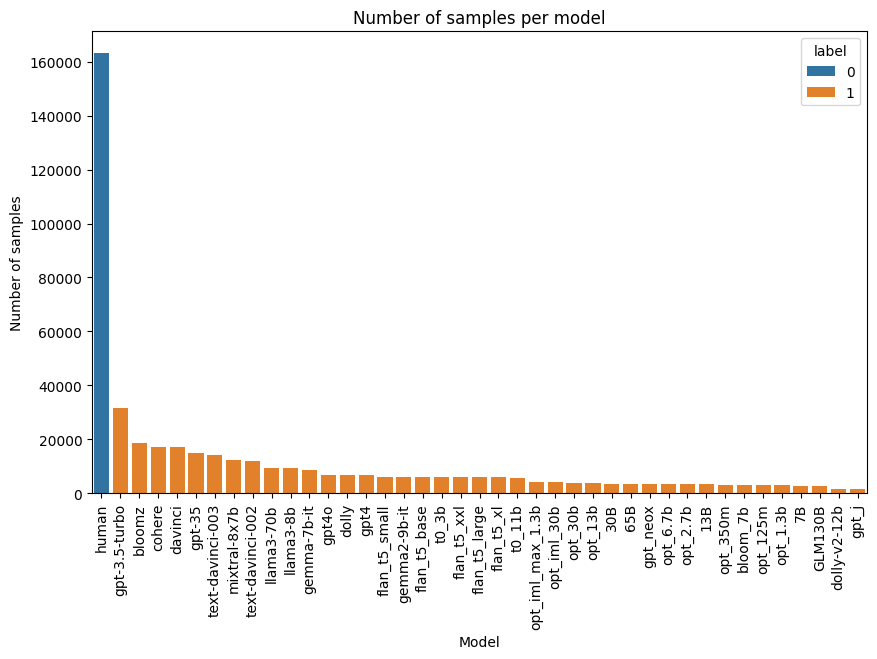

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sorted['model'], y=df_sorted['count'], hue='label', data=df_sorted)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Number of samples')
plt.title('Number of samples per model')